In [2]:
import pandas as pd

def footage_bucket_dataframe(start, end, step):
    low = start
    high = start + step

    rows = []
    for _ in range(start, end, step):
        rows.append({'low': low, 'high': high, 'bucket': f'{low}-{high}'})
        low = high
        high = low + step

    return pd.DataFrame(rows)

In [3]:
user_registration = pd.read_csv('user_registration.csv')
footage_bucket = footage_bucket_dataframe(500, 10000, 500)

In [8]:
footage_bucket

,low,high,bucket
0,500,1000,500-1000
1,1000,1500,1000-1500
2,1500,2000,1500-2000
3,2000,2500,2000-2500
4,2500,3000,2500-3000
5,3000,3500,3000-3500
6,3500,4000,3500-4000
7,4000,4500,4000-4500
8,4500,5000,4500-5000
9,5000,5500,5000-5500


In [4]:
user_registration['bucket_name'] = pd.cut(user_registration['house_square_footage'], bins=[0] + footage_bucket[['low', 'high']].stack()[1::2].tolist(), labels=footage_bucket['bucket'].tolist())

In [5]:
user_registration[['id', 'house_square_footage', 'bucket_name']]

,id,house_square_footage,bucket_name
0,1,8473,8000-8500
1,2,4955,4500-5000
2,3,3507,3500-4000
3,4,6725,6500-7000
4,5,6565,6500-7000
...,...,...,...
995,996,999,500-1000
996,997,4667,4500-5000
997,998,3721,3500-4000
998,999,3927,3500-4000


In [6]:
#result = user_registration.groupby('bucket_name').count()['id'].reset_index(name='count').sort_values(by=['count'], ascending=False)
result = user_registration.groupby('bucket_name').count()['id'].reset_index(name='count')

In [9]:
result

,bucket_name,count
0,500-1000,58
1,1000-1500,57
2,1500-2000,58
3,2000-2500,53
4,2500-3000,63
5,3000-3500,59
6,3500-4000,63
7,4000-4500,57
8,4500-5000,71
9,5000-5500,65


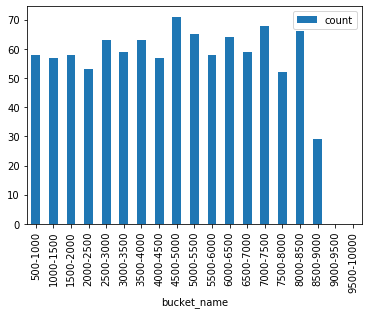

In [7]:
result.plot(kind='bar', x='bucket_name', y='count')